<a href="https://colab.research.google.com/github/KhushiBhadoria/ML-Algorithm-identifier-for-regression-based-dataset/blob/main/Algorithm_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt


In [157]:
file_name=input('Enter your file name : ')
df=pd.read_csv(file_name)

Enter your file name : Iris_dataset.csv


In [158]:
# replacing date column to Sno
if df.columns.any() == 'Date' and df.columns.any() !='Sno':
  df.insert(0, 'Sno', np.arange(len(df)))
  dates = df['Date']
  del df['Date']

In [159]:
  #replacing junk values by nan 
junk_values=('*','?','#','+','-')
for i in range(0,len(df.columns)):
   for j in range(0,len(df.index)):
     if type(df.iloc[j,i])==str:
        s=df.iloc[j,i].startswith(junk_values)
        if  s==True:
           df=df.replace(df.iloc[j,i],np.nan)
print(df.head(10))
print(df.columns)
       

   Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm      Species
0   1           NaN          NaN           NaN          0.2  Iris-setosa
1   2           4.9            3           1.4          NaN  Iris-setosa
2   3           4.7          NaN           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5             5          3.6           1.4          0.2  Iris-setosa
5   6           5.4          3.9           1.7          0.4  Iris-setosa
6   7           4.6          3.4           1.4          0.3  Iris-setosa
7   8             5          3.4           1.5          0.2  Iris-setosa
8   9           4.4          2.9           1.4          0.2  Iris-setosa
9  10           4.9          3.1           1.5          0.1  Iris-setosa
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [160]:
#select nan values columns
nan_columns=df.columns[df.isnull().any()]
print(nan_columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [161]:
#filling missing values in data
from sklearn.impute import SimpleImputer
op = int(input("Do you want to fill nan values with...\n1. Mean\n2. Median\nEnter 1 or 2: "))
if op==1:
  imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Mean..")
elif op==2:
  imputer=SimpleImputer(missing_values=np.nan,strategy='median')
  imputer=imputer.fit(df[nan_columns])
  df[nan_columns]=imputer.transform(df[nan_columns])
  print("Nan values are filled with Median..")
print(df)
  

Do you want to fill nan values with...
1. Mean
2. Median
Enter 1 or 2: 1
Nan values are filled with Mean..
      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1       5.848322  ...      0.200000     Iris-setosa
1      2       4.900000  ...      1.205369     Iris-setosa
2      3       4.700000  ...      0.200000     Iris-setosa
3      4       4.600000  ...      0.200000     Iris-setosa
4      5       5.000000  ...      0.200000     Iris-setosa
..   ...            ...  ...           ...             ...
145  146       6.700000  ...      2.300000  Iris-virginica
146  147       6.300000  ...      1.900000  Iris-virginica
147  148       6.500000  ...      2.000000  Iris-virginica
148  149       6.200000  ...      2.300000  Iris-virginica
149  150       5.900000  ...      1.800000  Iris-virginica

[150 rows x 6 columns]


In [162]:
# checking classification datatype string in each column
for i in range(len(df.columns)):
  if df.iloc[:, i].dtype == np.object:
    unique = np.unique(df.iloc[:, i])
    df.replace(unique, np.arange(len(unique)), inplace=True)

KFold

In [163]:
from  sklearn.model_selection import KFold
def kfold(X,Y,model):
  s=int(input("Enter no. of KFold:\n"))
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=(r2_score(Y_test,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score


def kfold_(X,Y,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)
  s=int(input("Enter no. of KFold: \n"))

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    acc=(r2_score(Y_train,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_train,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score
  




Train Test Split

In [164]:
from sklearn.model_selection import train_test_split
def train_test(X,Y,model):
  #size=float(input("Enter size of test data: \n"))

  Y=np.array(Y).astype(int)#cast pandas  object to integer
  Y=np.ravel(Y)#change a 2 dimensional or multi-dimensional array into a flattened array
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3,random_state=10)
  regressor=model
  regressor.fit(X_train,Y_train)
  Y_pred_test=regressor.predict(X_test)
  Y_pred_train=regressor.predict(X_train)

  return Y_pred_test,Y_test,Y_train,Y_pred_train
  

Accuracy Function

In [165]:
from sklearn.metrics import r2_score
def accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  r_testing=(r2_score(Y_test,Y_pred_test))*100
  r_training=(r2_score(Y_train,Y_pred_train))*100
  print("Accuracy of training:",r_training)
  print("Accuracy of testing:",r_testing)
  return r_training,r_testing

Error Function

In [166]:
from sklearn import metrics
def error_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  rmse_training=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
  rmse_testing=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
  print('Root Mean Squared Error of training:',np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))
  print('Root Mean Squared Error of testing:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
  return rmse_training,rmse_testing


In [167]:

print("what you want to predict"+str(list(df)))
choice=str(input('Enter your choice:'))
Y=df.loc[:,choice]
df_X=df.drop(choice,axis=1)
X=df_X[list(df_X)]



what you want to predict['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Enter your choice:Id


In [168]:
Algorithm=['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression']
Kfold_accuracy=[]
Kfold_error=[]
testing_accuracy=[]
testing_error=[]
training_accuracy=[]
training_error=[]

Scaling Data

In [169]:
Y_r=np.array(Y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit_transform(X)
sc_Y=StandardScaler().fit_transform(Y_r)

SVR

In [170]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
rmse_svr_Kfold,accuracy_svr_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_svr,r_testing_svr=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_svr,rmse_testing_svr=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_svr_Kfold)
Kfold_error.append(rmse_svr_Kfold)
testing_accuracy.append(r_testing_svr)
testing_error.append(rmse_testing_svr)
training_accuracy.append(r_training_svr)
training_error.append(rmse_training_svr)

Enter no. of KFold: 
5
Average RMSE using KFold :0.07036539274948028
Average accuracy using KFold :61.298178302214446
Accuracy of training: 64.2694557338962
Accuracy of testing: 41.614923346071066
Root Mean Squared Error of training: 0.403992569613647
Root Mean Squared Error of testing: 0.45435459521572474


Random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
rmse_random_Kfold,accuracy_random_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_random,r_testing_random=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_random,rmse_testing_random=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_random_Kfold)
Kfold_error.append(rmse_random_Kfold)
testing_accuracy.append(r_testing_random)
testing_error.append(rmse_testing_random)
training_accuracy.append(r_training_random)
training_error.append(rmse_training_random)

Enter no. of KFold:
5
Average RMSE using KFold :5.340830322462354
Average accuracy using KFold :-733.8179671679645
Accuracy of training: 97.97380115050854
Accuracy of testing: 75.51848144986324
Root Mean Squared Error of training: 6.3304926134361645
Root Mean Squared Error of testing: 20.00516073861387


Multiple Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rmse_multiple_Kfold,accuracy_multiple_Kfold=kfold(X,Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,model)
r_training_multiple,r_testing_multiple=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_multiple,rmse_testing_multiple=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_multiple_Kfold)
Kfold_error.append(rmse_multiple_Kfold)
testing_accuracy.append(r_testing_multiple)
testing_error.append(rmse_testing_multiple)
training_accuracy.append(r_training_multiple)
training_error.append(rmse_training_multiple)

Enter no. of KFold:
5
Average RMSE using KFold :4.861371281211445
Average accuracy using KFold :-533.7663349768053
Accuracy of training: 90.03360256569123
Accuracy of testing: 86.11329306730092
Root Mean Squared Error of training: 14.039950448566287
Root Mean Squared Error of testing: 15.066851361321921


KNN

In [173]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
rmse_knn_Kfold,accuracy_knn_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_knn,r_testing_knn=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_knn,rmse_testing_knn=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_knn_Kfold)
Kfold_error.append(rmse_knn_Kfold)
testing_accuracy.append(r_testing_knn)
testing_error.append(rmse_testing_knn)
training_accuracy.append(r_training_knn)
training_error.append(rmse_training_knn)

Enter no. of KFold: 
5
Average RMSE using KFold :0.07958224257542215
Average accuracy using KFold :48.33214182406853
Accuracy of training: 52.04527402700556
Accuracy of testing: 18.29608938547488
Root Mean Squared Error of training: 0.4680252333449758
Root Mean Squared Error of testing: 0.5374838498865699


Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
rmse_logistic_Kfold,accuracy_logistic_Kfold=kfold_(sc_X,sc_Y,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,model)
r_training_logistic,r_testing_logistic=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_logistic,rmse_testing_logistic=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_logistic_Kfold)
Kfold_error.append(rmse_logistic_Kfold)
testing_accuracy.append(r_testing_logistic)
testing_error.append(rmse_testing_logistic)
training_accuracy.append(r_training_logistic)
training_error.append(rmse_training_logistic)

Enter no. of KFold: 
5
Average RMSE using KFold :0.08366600265340755
Average accuracy using KFold :43.60542034163225
Accuracy of training: 45.790309769658464
Accuracy of testing: 5.726256983240241
Root Mean Squared Error of training: 0.4976133515281193
Root Mean Squared Error of testing: 0.5773502691896257


In [175]:
df_table=pd.DataFrame({'Algorithm':['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression'],'KFold_Accuracy':Kfold_accuracy,'KFold Error':Kfold_error,'Training_Accuracy':training_accuracy,
                        'Traning Error':training_error,'Testing_Accuracy':testing_accuracy,'Testing Error':testing_error})
print(df_table)

             Algorithm  KFold_Accuracy  ...  Testing_Accuracy  Testing Error
0                  SVR       61.298178  ...         41.614923       0.454355
1        Random Forest     -733.817967  ...         75.518481      20.005161
2  Multiple Regression     -533.766335  ...         86.113293      15.066851
3                  KNN       48.332142  ...         18.296089       0.537484
4   LogisticRegression       43.605420  ...          5.726257       0.577350

[5 rows x 7 columns]


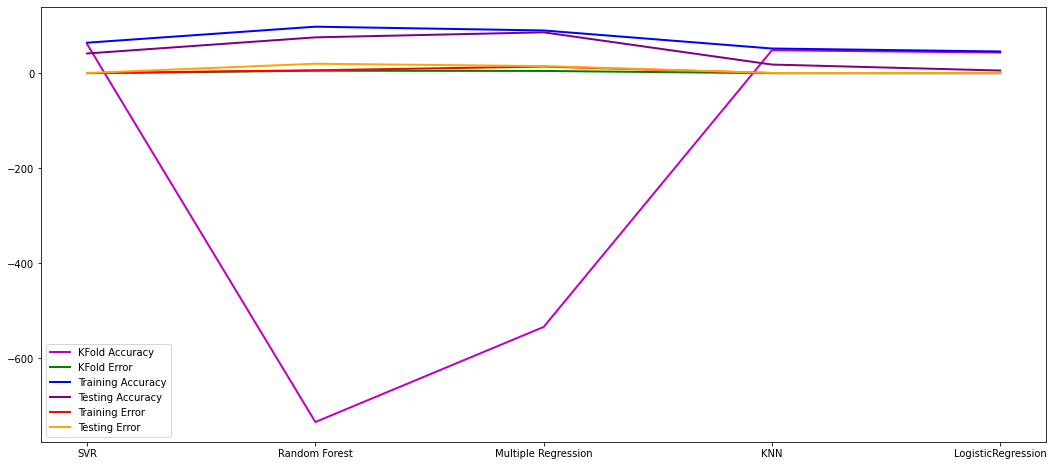

In [176]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(Algorithm,Kfold_accuracy,color='m',linewidth=2,label='KFold Accuracy')
plt.plot(Algorithm,Kfold_error,color='green',linewidth=2,label='KFold Error')
plt.plot(Algorithm,training_accuracy,color='blue',linewidth=2,label='Training Accuracy')
plt.plot(Algorithm,testing_accuracy,color='purple',linewidth=2,label='Testing Accuracy')
plt.plot(Algorithm,training_error,color='red',linewidth=2,label='Training Error')
plt.plot(Algorithm,testing_error,color='orange',linewidth=2,label='Testing Error')
plt.legend()

In [177]:
print("Sort your list by"+str(list(df_table)))
s=str(input('Enter your choice:'))#Enter string
sorted_df=df_table.sort_values(s,ascending=False,axis=0)
print(sorted_df)


Sort your list by['Algorithm', 'KFold_Accuracy', 'KFold Error', 'Training_Accuracy', 'Traning Error', 'Testing_Accuracy', 'Testing Error']
Enter your choice:KFold_Accuracy
             Algorithm  KFold_Accuracy  ...  Testing_Accuracy  Testing Error
0                  SVR       61.298178  ...         41.614923       0.454355
3                  KNN       48.332142  ...         18.296089       0.537484
4   LogisticRegression       43.605420  ...          5.726257       0.577350
2  Multiple Regression     -533.766335  ...         86.113293      15.066851
1        Random Forest     -733.817967  ...         75.518481      20.005161

[5 rows x 7 columns]


In [178]:
best_algo=sorted_df.loc[0,'Algorithm']
print('Best algorithm for your dataset is',best_algo)

Best algorithm for your dataset is SVR
